In [ ]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

def logistic_regression(x: np.array, y: np.array, learning_speed: float = 0.001, echoes: int = 1000, category_limits = 0.5, f1: tuple = (False, 0)): # limit approach options
      """
      A function that calculates coeficients of linear regression trough optimization
      of selected metrics and returs F1 metrics if requested.

      Parameters:
      x: Array with values of variables
      y: Array with values of dependent value
      learning_speed: Learning speed for optimization
      echoes: Number of iterations for optimization

      f1: Value that requests F1 metrics. False por default
      f1_obj: Boolean value that is objective for the calculation. Equals 0 por default
      """


      n = len(y)
      coef = np.zeros(len(x[0]) + 1)

      # y_pred = 1 / (1 + math.e ** (-np.sum(coef[:-1] * x, axis=1) - coef[-1])) # Predicted values
      # log_loss = (-1/n) * np.sum(y * (np.log(y_pred)) - (1 - y) * (np.log(1 - y_pred)))
      # df_y_pred = -(1 + math.e ** (-np.sum(coef[:-1] * x, axis=1) - coef[-1])) * math.e ** (-np.sum(coef[:-1] * x, axis=1) - coef[-1]) * x
      # df_log_y_pred = (1 / y_pred) * df_y_pred
      # df_log_1_y_pred = (1 / (1 - y_pred)) * (-1) * df_y_pred



      for _ in range(echoes):

              d = np.array([]) # Array to contain a step for each coef

              for idx in range(len(coef)):
                  d_coef = 0
                  for row in range(len(x)):
                      if idx == len(coef) - 1:
                          d_coef += (1) * (1 / (1 + math.e ** -(np.sum(coef[:-1] * x[row]) + coef[-1])) - y[row])
                      else:
                          d_coef += (x[row, idx]) * (1 / (1 + math.e ** -(np.sum(coef[:-1] * x[row]) + coef[-1])) - y[row]) # Sum of derivatives of (V1X1 + ... + VnXn + b - y) related to coef idx
                  d = np.append(d, ( 1 / n) * d_coef)

              coef -= learning_speed * d
              # print(coef)


      y_pred = 1 / (1 + math.e ** (-np.sum(coef[:-1] * x, axis=1) - coef[-1]))


      return (coef, y_pred)

In [ ]:
x1_rnd = np.array([])
x2_rnd = np.array([])
c1 = 5
c2 = 0.75
b = 15
for _ in range(5):
    x1_rnd = np.append(x1_rnd, np.random.randint(1, 10))
    x2_rnd = np.append(x2_rnd, np.random.randint(1, 10))

combo = zip(x1_rnd, x2_rnd)
x = np.array([list(elem) for elem in combo])
y_rnd = c1 * x1_rnd + c2 * x2_rnd + b


print(x1_rnd)
print(x2_rnd)


[3. 7. 8. 8. 8.]
[1. 9. 2. 3. 1.]


In [ ]:

print(x1_rnd)
print(x2_rnd)
y_rnd = np.array([0, 1, 0, 0, 0])

logistic_regression(x, y_rnd, learning_speed = 0.008, echoes = 3000)

[3. 7. 8. 8. 8.]
[1. 9. 2. 3. 1.]


(array([-0.03525661,  0.31838529, -1.01670768]),
 array([0.30915084, 0.83229266, 0.34029274, 0.41493413, 0.27281733]))

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x, y_rnd)
clf.predict(x)

array([0, 1, 0, 0, 0])

In [ ]:
def logistic_regression_upd(x: np.array, y: np.array, learning_speed: float = 0.001, echoes: int = 1000, category_limits = 0.5, f1: tuple = (False, 0)): # limit approach options
      """
      A function that calculates coeficients of linear regression trough optimization
      of selected metrics and returs F1 metrics if requested.

      Parameters:
      x: Array with values of variables
      y: Array with values of dependent value
      learning_speed: Learning speed for optimization
      echoes: Number of iterations for optimization

      f1: Value that requests F1 metrics. False por default
      f1_obj: Boolean value that is objective for the calculation. Equals 0 por default
      """

      cats = np.unique(y)
      base_code = [0] * len(cats)
      codificator = {'ND': base_code}

      for i, value in enumerate(cats):
          code = base_code.copy()
          code[i] = 1
          codificator[value] = code

      y_code = np.array([codificator[value] for value in y])

      n = len(y)
      coef = np.zeros((len(y_code[0]), len(x[0]) + 1))

      for _ in range(echoes):


          for i in range(len(coef)):
            d = np.array([]) # Array to contain a step for each coef
            for idx in range(len(coef[0])):
                  d_coef = 0
                  for row in range(len(x)):
                      if idx == len(coef[0]) - 1:
                          d_coef += (1) * (1 / (1 + math.e ** -(np.sum(coef[i][:-1] * x[row]) + coef[i][-1])) - y_code[row][i])
                      else:
                          d_coef += (x[row, idx]) * (1 / (1 + math.e ** -(np.sum(coef[i][:-1] * x[row]) + coef[i][-1])) - y_code[row][i]) # Sum of derivatives of (V1X1 + ... + VnXn + b - y) related to coef idx
                  d = np.append(d, ( 1 / n) * d_coef)

            coef[i] -= learning_speed * d
              # print(coef)

      y_pred = np.array([])
      for _ in range(len(y)):
          values = np.array([])
          for i in range(len(coef)):
              pred = (1 / (1 + math.e ** (-np.sum(coef[i][:-1] * x[_]) - coef[i][-1])))
              values = np.append(values, pred)
          y_pred = np.append(y_pred,values)
      y_pred = y_pred.reshape(len(y), len(coef))

      y_new = []
      for pred in y_pred:
          for key, value in codificator.items():
              if np.array_equal(pred, value):
                  y_new.append(key)
      y_new = np.array(y_new)




      return (y_pred)
      # return (codificator, y_new)

In [ ]:
def logistic_regression_upd_2(x: np.array, y: np.array, learning_speed: float = 0.001, echoes: int = 1000, category_limits = 0.5, f1: tuple = (False, 0)): # limit approach options
      """
      A function that calculates coeficients of linear regression trough optimization
      of selected metrics and returs F1 metrics if requested.

      Parameters:
      x: Array with values of variables
      y: Array with values of dependent value
      learning_speed: Learning speed for optimization
      echoes: Number of iterations for optimization

      f1: Value that requests F1 metrics. False por default
      f1_obj: Boolean value that is objective for the calculation. Equals 0 por default
      """

      cats = np.unique(y)
      base_code = [0] * len(cats)
      codificator = {'ND': base_code}

      for i, value in enumerate(cats):
          code = base_code.copy()
          code[i] = 1
          codificator[value] = code

      y_code = np.array([codificator[value] for value in y])

      n = len(y)
      coef = np.zeros((len(y_code[0]), len(x[0]) + 1))

      for _ in range(echoes):


          for i in range(len(coef)):
            d = np.array([]) # Array to contain a step for each coef
            for idx in range(len(coef[0])):
                  d_coef = 0
                  for row in range(len(x)):
                      #to find e
                      temp = np.sum(math.e ** np.sum((coef[:,:-1] * x[row]), axis = 1)+ coef[:, -1])
                      if idx == len(coef[0]) - 1:
                          d_coef += (1) * (((math.e ** (np.sum(coef[i][:-1] * x[row]) + coef[i][-1])) /
                                                     temp) - y_code[row][i])
                      else:
                          d_coef += (x[row, idx]) * (((math.e ** (np.sum(coef[i][:-1] * x[row]) + coef[i][-1])) /
                                                     temp) - y_code[row][i]) # Sum of derivatives of (V1X1 + ... + VnXn + b - y) related to coef idx
                  d = np.append(d, ( 1 / n) * d_coef)

            coef[i] -= learning_speed * d
              # print(coef)

      y_pred = np.array([])
      for _ in range(len(y)):
          values = np.array([])
          for i in range(len(coef)):

              temp = np.sum(math.e ** np.sum((coef[:,:-1] * x[_]), axis = 1)+ coef[:, -1])
              pred = round((math.e ** (np.sum(coef[i][:-1] * x[_]) + coef[i][-1])) / temp)
              values = np.append(values, pred)
          y_pred = np.append(y_pred,values)
      y_pred = y_pred.reshape(len(y), len(coef))

      y_new = []
      for pred in y_pred:
          for key, value in codificator.items():
              if np.array_equal(pred, value):
                  y_new.append(key)
      y_new = np.array(y_new)




      return (y_new, coef)
      # return (codificator, y_new)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

iris = load_iris()
x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)
x
# scaler = StandardScaler().fit(x_train)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

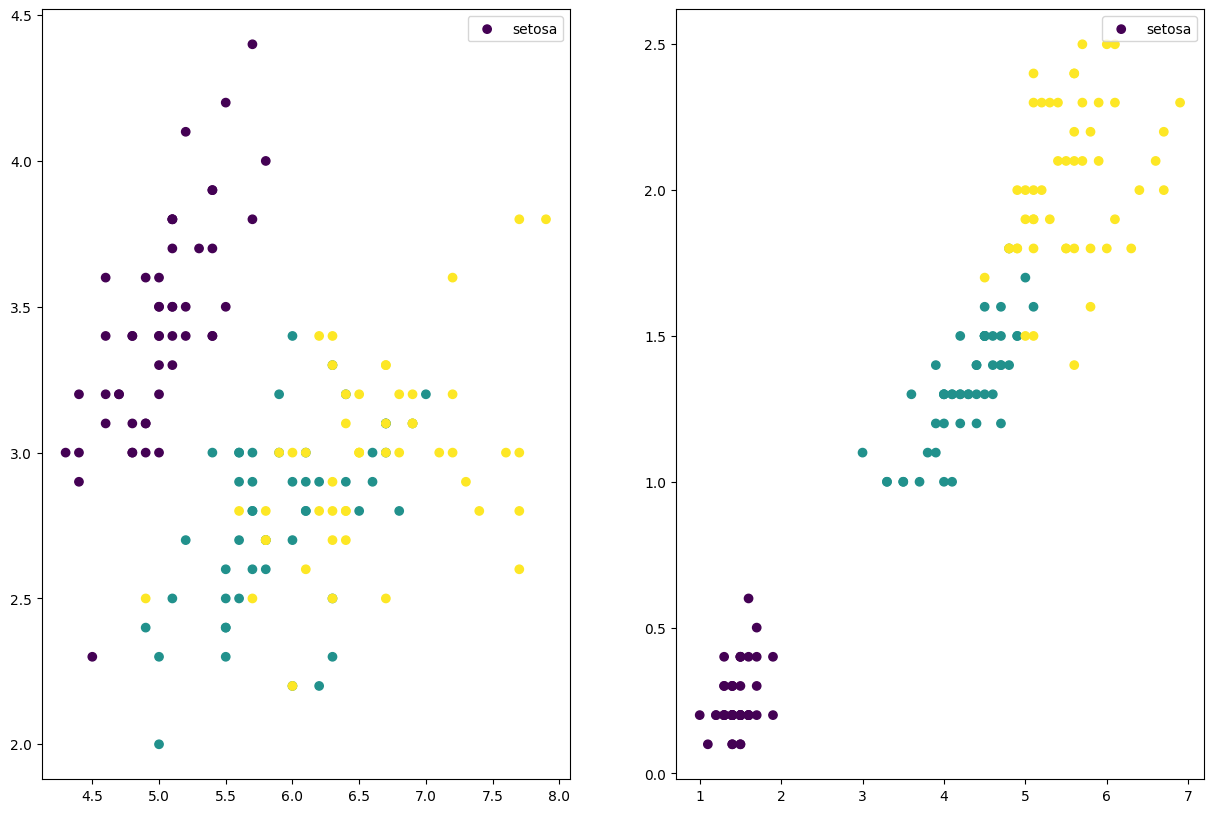

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

axes[0].scatter(x[:, 0], x[:, 1], c=y)
axes[0].legend(iris.target_names)


axes[1].scatter(x[:, 2], x[:, 3], c=y)
axes[1].legend(iris.target_names)

plt.show()

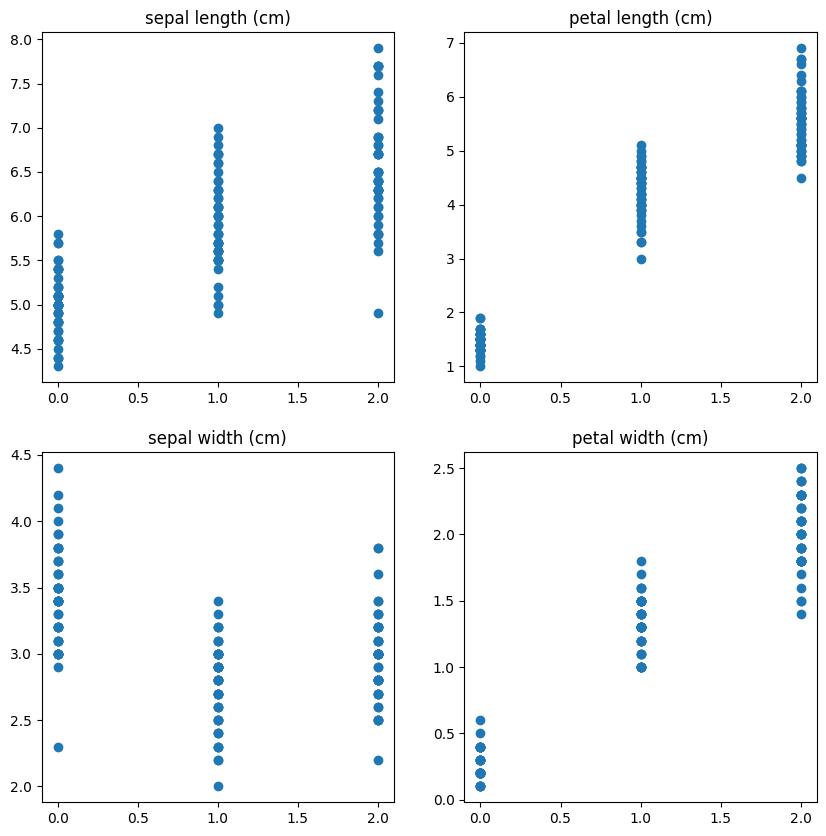

In [ ]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(10, 10)

for idx in range(len(x[0])):
    axes[idx % 2, idx // 2].plot( y, x[:, idx], 'o')
    axes[idx % 2, idx // 2].set_title(iris.feature_names[idx])
plt.show()

In [ ]:
df = pd.DataFrame(x)
df.columns = iris.feature_names
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
groups = df.groupby('target').agg({'sepal length (cm)': 'mean',
                                   'sepal width (cm)': 'mean',
                                  'petal length (cm)': 'mean',
                                   'petal width (cm)': 'mean'})
groups

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [ ]:
corr_model = df.corr()
corr_model

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [ ]:
print(logistic_regression_upd_2(x_train, y_train, learning_speed = 0.0008, echoes = 10000)) #max score
print(y_train)

['0' '0' '1' '0' '0' '2' '1' '0' '0' '0' '2' 'ND' '1' '0' '0' '1' '2' '2'
 '1' '2' 'ND' '2' '2' '0' '2' '1' '0' '0' '0' '1' '2' '0' '0' '0' 'ND' '0'
 '1' '2' '0' '1' '2' '0' '2' '2' '1' '2' '2' 'ND' '0' '1' '2' '0' '0' '1'
 'ND' '0' '2' '0' '0' '2' '1' '2' '2' '2' '2' 'ND' '0' '0' '2' '2' '0' '0'
 '0' 'ND' '2' '0' '2' '2' '0' 'ND' '1' '2' '1' '2' '0' '2' 'ND' '2' '1'
 'ND' 'ND' '0' '1' 'ND' '0' '1' '2' '2' '0' '1' '2' '2' '0' '2' '0' '1'
 '2' '2' '1' '2' '1' '1' '2' '2' '0' '1' '2' '0' '1' '2']
[0 0 1 0 0 2 1 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1
 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1
 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1
 1 2 2 0 1 2 0 1 2]


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
clf.predict(x_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [ ]:
class CustLogisticRegression:
    def __init__(self, learning_speed: float = 0.001, echoes: int = 1000, prob_limit: float = 0.5, f1: tuple = (False, 0)):
        self.__learning_speed = learning_speed
        self.__echoes = echoes
        self.__prob_limit = prob_limit
        self.__f1 = f1
        self.__num_categories = 0
        self.__coef = None
        self.__codificator = None

    @property
    def learning_speed(self):
        return self.__learning_speed

    @property
    def echoes(self):
        return self.__echoes

    @property
    def prob_limit(self):
        return self.__prob_limit

    @property
    def f1(self):
        return self.__f1

    @learning_speed.setter
    def learning_speed(self, learning_speed: float):
        self.__learning_speed = learning_speed

    @echoes.setter
    def echoes(self, echoes: int):
        self.__echoes = echoes

    @prob_limit.setter
    def prob_limit(self, prob_limit: float):
        self.__prob_limit = prob_limit

    @f1.setter
    def f1(self, f1: tuple):
        self.__f1 = f1



    def fit(self, x: np.array, y: np.array):

        cats = np.unique(y)
        self.__num_categories = len(cats)

        base_code = [0] * len(cats)
        codificator = {'ND': base_code}

        for i, value in enumerate(cats): # Creates a dict with list code for each category
            code = base_code.copy()
            code[i] = 1
            codificator[value] = code

        self.__codificator = codificator #onehot

        y_code = np.array([codificator[value] for value in y]) # Train ependent variable with code values

        n = len(y)
        coef = np.zeros((len(y_code[0]), len(x[0]) + 1)) # Coefficients array with a row of coefficients for each category

        # Grdient descent
        for _ in range(self.__echoes):
            for i in range(len(coef)):
              d = np.array([]) # Array to contain a gradient for each coef
              for idx in range(len(coef[0])):
                    d_coef = 0
                    for row in range(len(x)):

                        temp = np.sum(math.e ** np.sum((coef[:,:-1] * x[row]), axis = 1)+ coef[:, -1]) # Divisor of softmax function
                        if idx == len(coef[0]) - 1:
                            d_coef += (1) * (((math.e ** (np.sum(coef[i][:-1] * x[row]) + coef[i][-1])) / # Logloss diferential using Softmax function as prob for bias
                                                      temp) - y_code[row][i])
                        else:
                            d_coef += (x[row, idx]) * (((math.e ** (np.sum(coef[i][:-1] * x[row]) + coef[i][-1])) /
                                                      temp) - y_code[row][i]) # # Logloss diferential using Softmax function as prob for each coef
                    d = np.append(d, ( 1 / n) * d_coef)

              coef[i] -= self.__learning_speed * d

        self.__coef = coef


    def predict(self, x: np.array):

        # Calculation of coded predictions
        y_pred = np.array([])
        for _ in range(len(x)):
            values = np.array([])
            for i in range(len(self.__coef)):

                temp = np.sum(math.e ** np.sum((self.__coef[:,:-1] * x[_]), axis = 1)+ self.__coef[:, -1])
                pred = (math.e ** (np.sum(self.__coef[i][:-1] * x[_]) + self.__coef[i][-1])) / temp

                # Round of the values depending on the limit
                if pred > self.__prob_limit:
                    pred = 1
                else:
                    pred = 0

                values = np.append(values, pred)
            y_pred = np.append(y_pred,values)
        y_pred = y_pred.reshape(len(x), len(self.__coef)) # Could not create y_pred of required shape from the beginning

        # Translating the codes in initial categories
        y_new = []
        for pred in y_pred:
            for key, value in self.__codificator.items():
                if np.array_equal(pred, value):
                    y_new.append(key)
        y_new = np.array(y_new)

        return (y_new)
        #predict proba

In [ ]:
model = CustLogisticRegression(learning_speed = 0.0008, echoes = 20000)
model.fit(x_train, y_train)

In [ ]:
print(model.predict(x_test))
print(y_test)

['1' '0' '2' 'ND' '1' '0' '1' '2' 'ND' '1' '2' '0' '0' '0' '0' 'ND' '2'
 '1' 'ND' '2' '0' '2' '0' '2' '2' '2' '2' '2' '0' '0']
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [ ]:
x_1 = x[:, [0, 3]]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.2, random_state = 42)
model = CustLogisticRegression(learning_speed = 0.0008, echoes = 20000)
model.fit(x_train, y_train)

In [ ]:
print(model.predict(x_test))
print(y_test)

['ND' '0' '2' 'ND' 'ND' '0' 'ND' '2' 'ND' 'ND' '2' '0' '0' '0' '0' 'ND'
 '2' 'ND' 'ND' '2' '0' '2' '0' '2' 'ND' '2' 'ND' '2' '0' '0']
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
